IMPORTING THE LIBRARIES

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

READING THE DATASET

In [77]:
match = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')
match.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


EXPLORATORY DATA ANALYSIS

In [78]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [79]:
match.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [80]:
match.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

RUNS SCORED BY A BATSMAN

In [82]:
batsman = match.batsman.unique()
runs_by_batsman = dict(zip(batsman,np.zeros(len(batsman))))
# print(runs_by_batsman)
for i in range(0,len(match)):
    runs_by_batsman[match['batsman'][i]] += match['total_runs'][i]

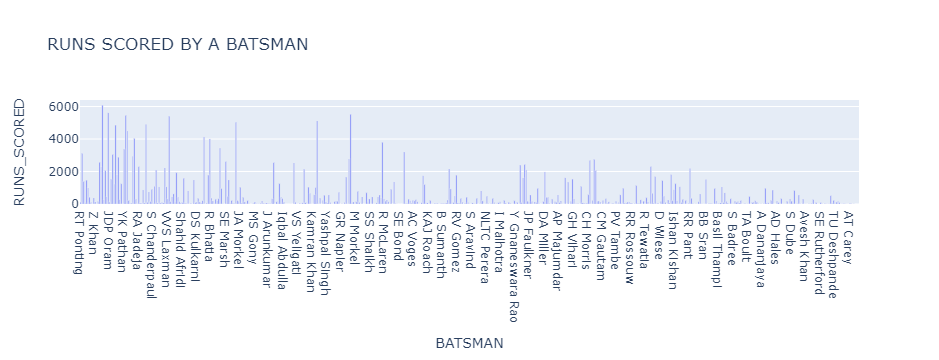

In [83]:
runs_data = pd.DataFrame(dict(BATSMAN = runs_by_batsman.keys(),RUNS_SCORED = runs_by_batsman.values()))
runs_graph = px.bar(runs_data , x = 'BATSMAN',y='RUNS_SCORED',title = "RUNS SCORED BY A BATSMAN")
runs_graph

NUMBER OF FOURS

In [84]:
bds_by_batsman = dict(zip(batsman,np.zeros(len(batsman))))
# print(runs_by_batsman)
for i in range(0,len(match)):
    if(match['batsman_runs'][i] == 4):
        bds_by_batsman[match['batsman'][i]] += 1


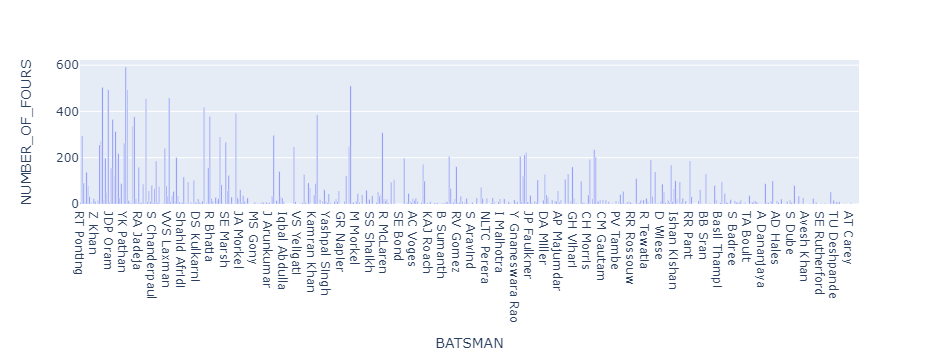

In [85]:
bds_data = pd.DataFrame(dict(BATSMAN = bds_by_batsman.keys(),NUMBER_OF_FOURS = bds_by_batsman.values()))
bds_graph = px.bar(bds_data , x = 'BATSMAN',y='NUMBER_OF_FOURS')
bds_graph

NUMBER OF SIXES

In [86]:
six_by_batsman = dict(zip(batsman,np.zeros(len(batsman))))
# print(runs_by_batsman)
for i in range(0,len(match)):
    if(match['batsman_runs'][i] == 6 ):
        six_by_batsman[match['batsman'][i]] += 1

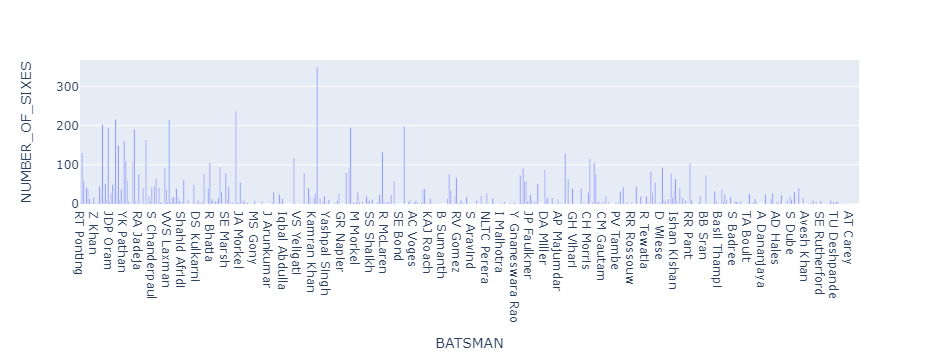

In [87]:
six_data = pd.DataFrame(dict(BATSMAN = six_by_batsman.keys(),NUMBER_OF_SIXES = six_by_batsman.values()))
six_graph = px.bar(six_data , x = 'BATSMAN',y='NUMBER_OF_SIXES')
six_graph

In [88]:
self_out = ['obstructing the field','retired hurt','run out']

BOWLER STATS

In [89]:
bowler = match.bowler.unique()

In [90]:
wicks = dict(zip(bowler,np.zeros(len(bowler))))
for i in range(0,len(match)):
    if(match['is_wicket'][i] == 1 and match['dismissal_kind'][i] != 'run out' and match['dismissal_kind'][i] != 'hit wicket' and match['dismissal_kind'][i] != 'obstructing the field' and match['dismissal_kind'][i] != 'retired hurt' and match['dismissal_kind'][i] != 'nan'):
        wicks[match['bowler'][i]] += 1

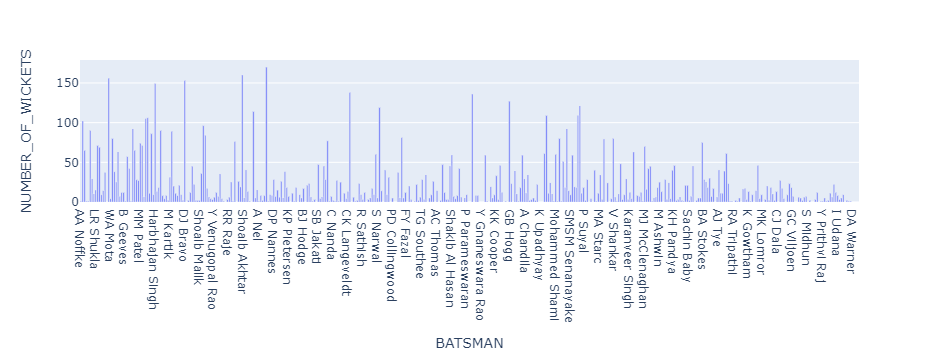

In [91]:
wicks_data = pd.DataFrame(dict(BATSMAN = wicks.keys(),NUMBER_OF_WICKETS = wicks.values()))
wicks_graph = px.bar(wicks_data , x = 'BATSMAN',y='NUMBER_OF_WICKETS')
wicks_graph

In [92]:
extras_data = match.extras_type.unique()
extras = dict(zip(extras_data,np.zeros(len(extras_data))))
for i in range(0,len(match)):
    if(match['extras_type'][i] != 'Nan'):
        extras[match['extras_type'][i] ]+= 1

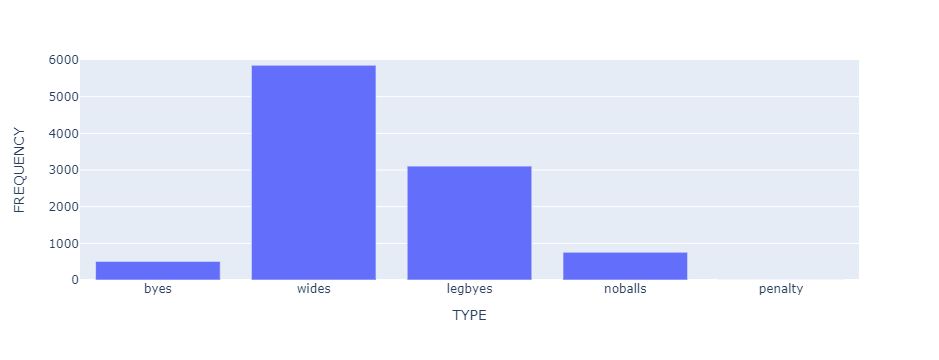

In [93]:
extras_data = pd.DataFrame(dict(TYPE = extras.keys(),FREQUENCY = extras.values()))
extras_graph = px.bar(extras_data , x = 'TYPE',y='FREQUENCY')
extras_graph.update_yaxes(range = [0,6000],autorange=False)

In [94]:
extras_per_bowler = dict(zip(bowler,np.zeros(len(bowler))))
for i in range(0,len(match)):
    if(match['extra_runs'][i] != 0):
        extras_per_bowler[match['bowler'][i]] += 1
# print(extras_per_bowler)

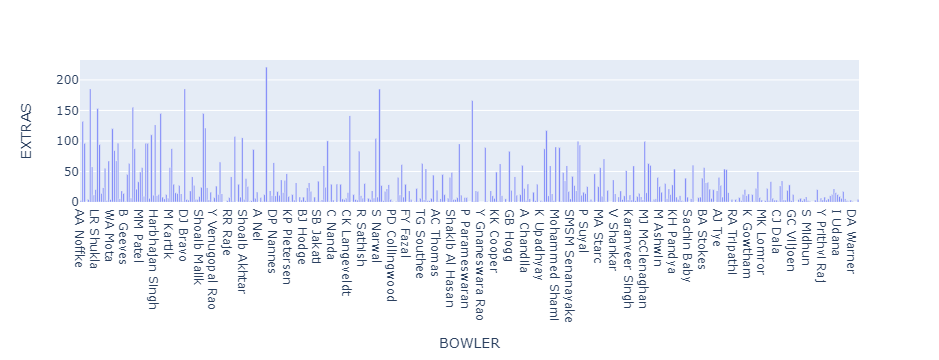

In [95]:
extra_data = pd.DataFrame(dict(BOWLER = extras_per_bowler.keys(),EXTRAS = extras_per_bowler.values()))
extra_graph = px.bar(extra_data , x = 'BOWLER',y='EXTRAS')
extra_graph

PLAYER AGAINST A TEAM

In [ ]:
#Player vs Team
player = input("Enter the name of the player: ")
team = input("Enter the name of the team :")
runs_scored = 0
for i in range(0,len(match)):
    if(match['batsman'][i]==player and match['bowling_team'][i] == team):
        runs_scored += match['batsman_runs'][i]
print(player.upper(),"scored", runs_scored,"runs against",team)

In [24]:
player = input("Enter the name of the player: ")
team = input("Enter the name of the team :")
times_dismissed = 0
for i in range(0,len(match)):
    if(match['batsman'][i]==player and match['bowling_team'][i] == team and match['is_wicket'][i] == 1):
        times_dismissed += 1
print(player.upper(),"was dismissed", times_dismissed,"times by",team)

Enter the name of the player:  MS Dhoni
Enter the name of the team : Rajasthan Royals


MS DHONI was dismissed 13 times by Rajasthan Royals


BATSMAN AGAINST A BOWLER

In [25]:
#BATSMAN VS BOWLER
batsman = input("Enter the name of the batsman: ")
bowler = input("Enter the name of the bowler :")
times_dismissed = 0
runs_scored = 0
for i in range(0,len(match)):
    if(match['batsman'][i] == batsman and match['bowler'][i] == bowler and match['is_wicket'][i] == 1):
        times_dismissed += 1
    if(match['batsman'][i] == batsman and match['bowler'][i] == bowler and match['is_wicket'][i] == 0):
        runs_scored += match['batsman_runs'][i]
print(bowler.upper()," had dismissed",batsman.upper(),"on",times_dismissed,"occassions")
print(batsman.upper(),"scored",runs_scored,"runs against",bowler)

Enter the name of the batsman:  MS Dhoni
Enter the name of the bowler : SL Malinga


SL MALINGA  had dismissed MS DHONI on 2 occassions
MS DHONI scored 89 runs against SL Malinga


PERFORMANCE OF A PLAYER IN THE DEATH OVERS

In [26]:
#death overs

batsman = input("Enter the name of the batsman: ")
bowler = input("Enter the name of the bowler :")
runs_bats=0
runs_bowls = 0
wicks_in_death=0
for i in range(0,len(match)):
    if(match['over'][i] >= 16 and match['batsman'][i] == batsman):
        runs_bats += match['batsman_runs'][i]
    if(match['over'][i] >= 16 and match['bowler'][i] == bowler):
        runs_bowls += match['batsman_runs'][i] + match['extra_runs'][i]
    if(match['over'][i] >= 16 and match['bowler'][i] == bowler and match['is_wicket'][i] == 1 and match['dismissal_kind'][i] != 'run out' and match['dismissal_kind'][i] != 'hit wicket' and match['dismissal_kind'][i] != 'obstructing the field' and match['dismissal_kind'][i] != 'retired hurt' and match['dismissal_kind'][i] != 'nan'):
        wicks_in_death+=1
print('Runs scored by',batsman.upper(),"in the death overs:",runs_bats)
print('Runs conceeded by',bowler.upper(),'in the death overs:',runs_bowls)
print('Wickets in the death overs by',bowler,":",wicks_in_death)

Enter the name of the batsman:  MS Dhoni
Enter the name of the bowler : SL Malinga


Runs scored by MS DHONI in the death overs: 2303
Runs conceeded by SL MALINGA in the death overs: 1252
Wickets in the death overs by SL Malinga : 90


RUNS SCORED IN A PARTICULAR OVER

In [29]:
#runs scored by a player in a particular over

player = input("Enter the name of the batsman:")
over = int(input("Over number :"))
runs_scored = 0

for i in range(0,len(match)):
    if(match['over'][i] == over and match['batsman'][i] == player):
        runs_scored += match['batsman_runs'][i]
print(player,"has scored",runs_scored,"runs in over number:",over)

Enter the name of the batsman: V Kohli
Over number : 10


V Kohli has scored 356 runs in over number: 10


DISMISSAL TYPE OF A BATSMAN

Enter the name of the batsman :  SK Raina


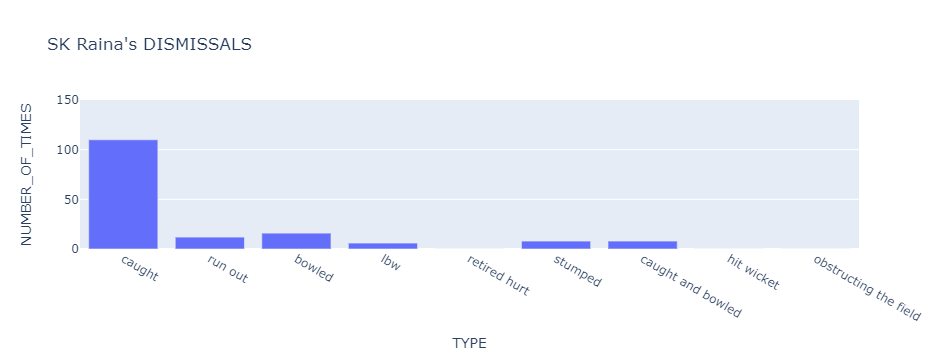

In [41]:
#dismissal type of a batsman
player = input("Enter the name of the batsman : ")
dismissal = match.dismissal_kind.unique()
out = dict(zip(dismissal,np.zeros(len(dismissal))))
for i in range(0,len(match)):
    if(match['batsman'][i] == player):
        out[match['dismissal_kind'][i]] += 1
        

plot_data = pd.DataFrame(dict(TYPE = out.keys(), NUMBER_OF_TIMES = out.values()))
plot_graph = px.bar(plot_data , x = "TYPE" , y = "NUMBER_OF_TIMES",title = player+"'s DISMISSALS")
plot_graph.update_yaxes(range=[0,150],autorange=False)

NUMBER OF DOT BALLS BOWLED BY A PLAYER

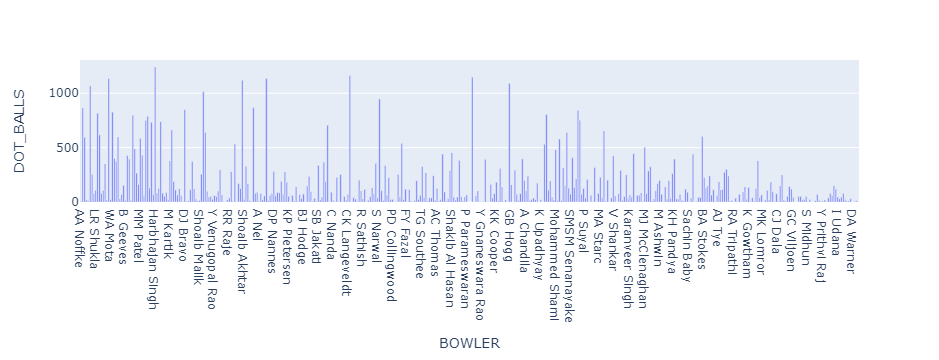

In [47]:
#dot balls

bowler = match.bowler.unique()
dots_by_bowler = dict(zip(bowler,np.zeros(len(bowler))))


for i in range(0,len(match)):
    if((match['total_runs'][i] == 0 or match['is_wicket'][i] == 1) and (match['dismissal_kind'][i] != 'run out' and match['dismissal_kind'][i] != 'nan')):
         dots_by_bowler[match['bowler'][i]] += 1
                                                                        
dot_data = pd.DataFrame(dict(BOWLER = dots_by_bowler.keys(),DOT_BALLS = dots_by_bowler.values()))
dot_graph = px.bar(dot_data,x='BOWLER',y='DOT_BALLS')
dot_graph
                                                            